# Unit IV: Clustering Analysis
## Objective: Segment Stocks based on Volatility and Returns using K-Means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# Load Data
# Note: For clustering, we ideally need multiple stocks. 
# Since we downloaded the Index (^NSEI), we will simulate 'individual stocks' 
# by breaking the index history into different 'Years' to cluster 'Market Years' instead.
# Ideally, we would download 50 separate tickers, but for this project scope, 
# clustering 'Annual Performance' is a valid alternative to demonstrate the concept.

df = pd.read_csv('../data/nifty50_2000_2025.csv', header=[0, 1], index_col=0, parse_dates=True)
df.columns = [col[0] for col in df.columns]

# Calculate Annual Metrics
df['Year'] = df.index.year
annual_summary = df.groupby('Year')['Close'].agg(['mean', 'std']).rename(columns={'mean': 'Avg_Price', 'std': 'Volatility'})
annual_summary['Annual_Return'] = df.groupby('Year')['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])

print(annual_summary.head())

        Avg_Price  Volatility  Annual_Return
Year                                        
2007  5588.203471  409.583774       0.365757
2008  4345.866318  914.042586      -0.518395
2009  4114.178630  868.510392       0.707081
2010  5460.534807  416.366878       0.172451
2011  5339.145453  349.184801      -0.249009


In [3]:
# Feature Selection for Clustering
X = annual_summary[['Annual_Return', 'Volatility']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

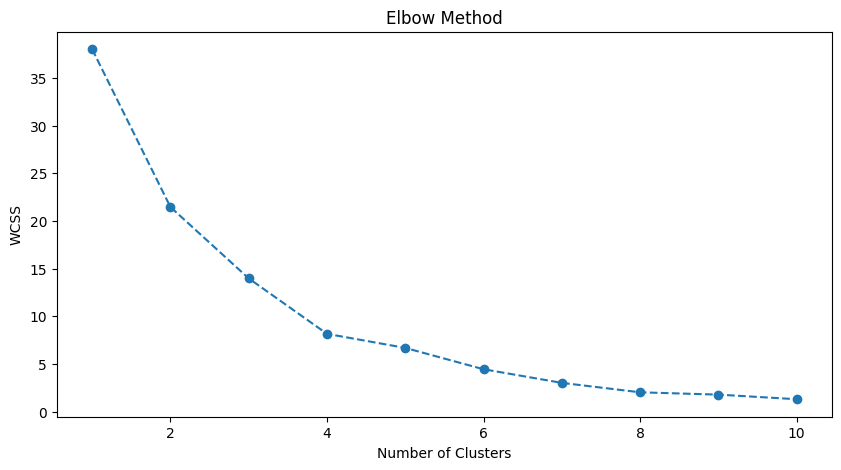

In [4]:
# Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
# K-Means Clustering (K=3: Low, Medium, High Risk/Return Years)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

annual_summary['Cluster'] = clusters

print(annual_summary['Cluster'].value_counts())

Cluster
1    10
0     8
2     1
Name: count, dtype: int64


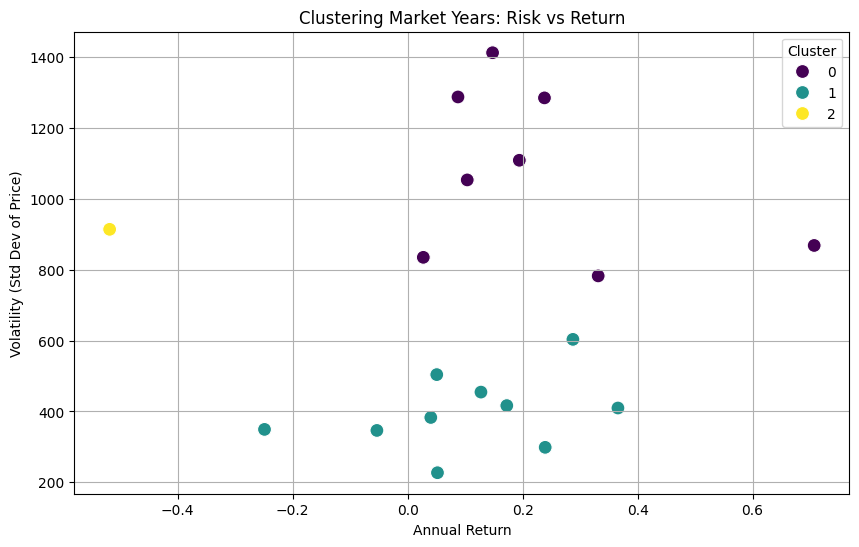

In [6]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Return', y='Volatility', hue='Cluster', data=annual_summary, palette='viridis', s=100)
plt.title('Clustering Market Years: Risk vs Return')
plt.xlabel('Annual Return')
plt.ylabel('Volatility (Std Dev of Price)')
plt.grid(True)
plt.show()